# Compare Nanoparticle Electrodes with Small and High Catalyst Loading

In [8]:
import os
import numpy as np
import pandas as pd
from renishawWiRE import WDFReader
import logging

folder = './'
logging.basicConfig(level=logging.INFO)
RamanFiles = [os.path.join(folder, RamanFile) for RamanFile in os.listdir(folder) if RamanFile.endswith(".wdf")]
RamanData = pd.DataFrame()
for RamanFile in RamanFiles: 
    try: 
        reader = WDFReader(RamanFile)
        reader.print_info()
        data = pd.DataFrame({'wave number (cm-1)': reader.xdata, 
                            'intensity (counts)': reader.spectra})
        data.to_csv(f'{RamanFile[:-4]}.txt', sep = '\t')
        data['fname'] = np.full(len(data['wave number (cm-1)']), RamanFile)
        RamanData = pd.concat([RamanData, data])
    except Exception: 
        reader = WDFReader(RamanFile)
        reader.print_info()
        data = pd.DataFrame({'wave number (cm-1)': reader.xdata, 
                            'intensity (counts)': np.ravel(reader.spectra[3,:])})
        data['fname'] = np.full(len(data['wave number (cm-1)']), RamanFile)
        RamanData = pd.concat([RamanData, data])
    


                   Title:	Single scan measurement 2
             WiRE version:	5.4.0.17909
        Laser Wavelength:	785.1154380376776 nm
                   Count:	1
                Capacity:	1
      Point Per Spectrum:	1015
               Scan Type:	Static
        Measurement Type:	Single
           Spectral Unit:	counts
              Xlist Unit:	1/cm
            Xlist Length:	1015
              Ylist Unit:	px
            Ylist Length:	1
                   Title:	Single scan measurement
             WiRE version:	5.4.0.17909
        Laser Wavelength:	785.1154380376776 nm
                   Count:	360
                Capacity:	360
      Point Per Spectrum:	1015
               Scan Type:	Static
        Measurement Type:	Series
           Spectral Unit:	counts
              Xlist Unit:	1/cm
            Xlist Length:	1015
              Ylist Unit:	px
            Ylist Length:	1
                   Title:	Single scan measurement
             WiRE version:	5.4.0.17909
        Laser Wavelengt

In [9]:
RamanData['fname'].unique()

array(['./CL20250721_016_Co3O4_#21_Image2_Spot1_30mW_1s_small_loading.wdf',
       './CL20250727_001_Co3O4#43_0p1MKOHpristine_high_loading.wdf',
       './CL20250721_011_Co3O4_#21_Image4_Spot2_30mW_1s_small_loading.wdf'],
      dtype=object)

-------
{'half_window': 20}
*******
-------
{'half_window': 20}
*******
-------
{'half_window': 20}
*******
False
False
False


<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:50: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:50: SyntaxWarning: invalid escape sequence '\m'
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_23917/3688944881.py:38: SyntaxWarning: invalid escape sequence '\m'
  labels = ['Spin-cast $\mathrm{Co_3O_4 \ electrode \ spot \ 1}$', 'Spin-cast $\mathrm{Co_3O_4 \ electrode \ spot \ 2}$', 'Drop-cast $\mathrm{Co_3O_4}$ electrode']
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_23917/3688944881.py:38: SyntaxWarning: invalid escape sequence '\m'
  labels = ['Spin-cast $\mathrm{Co_3O_4 \ electrode \ spot \ 1}$', 'Spin-cast $\mathrm{Co_3O_4 \ electrode \ spot \ 2}$', 'Drop-cast $\mathrm{Co_3O_4}$ electrode']
/var/folde

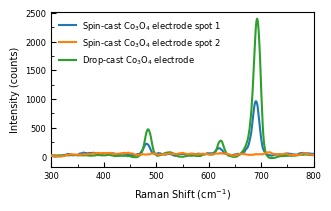

In [10]:
from renishawWiRE import WDFReader
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
from pybaselines import morphological
from scipy.signal import savgol_filter
selection = ['CL20250721_016_Co3O4_#21_Image2_Spot1_30mW_1s_small_loading.wdf', 'CL20250721_011_Co3O4_#21_Image4_Spot2_30mW_1s_small_loading.wdf', 'CL20250727_001_Co3O4#43_0p1MKOHpristine_high_loading.wdf']

samples = RamanData['fname'].dropna().unique()
samples = sorted(
    samples,
    key=lambda x: selection.index(os.path.basename(x)) if os.path.basename(x) in selection else len(selection)
)

for sample in samples: 
    intensity = RamanData.loc[RamanData['fname'] == sample, 'intensity (counts)'].to_numpy()
    background, params = morphological.rolling_ball(intensity, half_window=20)
    smoothed = savgol_filter(intensity - background, 10, 1)

    RamanData.loc[RamanData['fname'] == sample, 'background'] = background
    
    RamanData.loc[RamanData['fname'] == sample, 'smoothed intensity'] = smoothed
    print(f'-------\n{params}\n*******')

# Set up figure
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['axes.labelsize']  = 7
plt.rcParams['legend.fontsize'] = 6
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

fig, ax = plt.subplots(figsize=(1.6*2, 1*2), constrained_layout = True)

lines = {}

ic = 0
zorders = [10, 100, 10]
labels = ['Spin-cast $\mathrm{Co_3O_4 \ electrode \ spot \ 1}$', 'Spin-cast $\mathrm{Co_3O_4 \ electrode \ spot \ 2}$', 'Drop-cast $\mathrm{Co_3O_4}$ electrode']
for sample in samples:
    print(sample in selection)
    if os.path.basename(sample) in selection:
    
        label = RamanData.loc[RamanData['fname'] == sample, 'fname'].iloc[0]
        lines[label], = ax.plot(
            RamanData.loc[RamanData['fname'] == sample, 'wave number (cm-1)'],
            RamanData.loc[RamanData['fname'] == sample, 'smoothed intensity'],
            label=labels[ic], zorder = zorders[ic]
        )
        ic +=1
ax.set_xlabel('Raman Shift ($\mathrm{cm^{-1}})$')
ax.set_ylabel('Intensity (counts)')
ax.set_xlim(left = 300, right = 800)
ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
plt.legend(frameon= False)
plt.savefig(f'Spectra_Confocal_Raman.png', dpi = 600); plt.show()


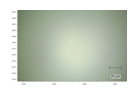

In [11]:
image_path = './CL20250722_011_Co3O4_#21_50x0p5_L_Image1_small_loading.jpg'
import cv2
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


height, width = image.shape[:2]
cropped = image[:, :]
height, width = cropped.shape[:2]
center_x, center_y = width // 2, height // 2
fig, ax = plt.subplots(figsize = (1.5,1.5)) 
ax.imshow(cropped)
plt.axis('off')
plt.show()

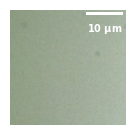

In [12]:
image_path = './CL20250722_011_Co3O4_#21_50x0p5_L_Image1_small_loading.jpg'
import cv2


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib_scalebar.scalebar import ScaleBar
import cv2
 


# Create scale bar
scalebar = ScaleBar(dx = float(20/float(870-775)), 
                    units = "µm",
                    length_fraction=0.4,
                    height_fraction = 0.025, 
                    font_properties = {'size': 7, 'weight': 'bold'},
                    color = 'white', 
                    box_color = 'none' )


image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


height, width = image.shape[:2]
cropped = image[150:300, 150:300]
height, width = cropped.shape[:2]
center_x, center_y = width // 2, height // 2
fig, ax = plt.subplots(figsize = (1.5,1.5)) 
ax.imshow(cropped)
ax.add_artist(scalebar)
ax.set_aspect('equal')
plt.axis('off')
plt.savefig(f'light_micrograph_small_loading.tif', dpi = 600); plt.show()


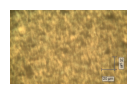

In [13]:
image_path = './CL20250727_001_Co3O4#43_Image4_0p1M_KOH_high_loading.jpg'
import cv2
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


height, width = image.shape[:2]
cropped = image[:, :]
height, width = cropped.shape[:2]
center_x, center_y = width // 2, height // 2
fig, ax = plt.subplots(figsize = (1.5,1.5)) 
ax.imshow(cropped)
plt.axis('off')
plt.show()

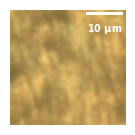

In [14]:
image_path = './CL20250727_001_Co3O4#43_Image4_0p1M_KOH_high_loading.jpg'
import cv2


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib_scalebar.scalebar import ScaleBar
import cv2
 


# Create scale bar
scalebar = ScaleBar(dx = float(20/float(870-775)), 
                    units = "µm",
                    length_fraction=0.4,
                    height_fraction = 0.025, 
                    font_properties = {'size': 7, 'weight': 'bold'},
                    color = 'white', 
                    box_color = 'none' )


image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


height, width = image.shape[:2]
cropped = image[150:300, 150:300]
height, width = cropped.shape[:2]
center_x, center_y = width // 2, height // 2
fig, ax = plt.subplots(figsize = (1.5,1.5)) 
ax.imshow(cropped)
ax.add_artist(scalebar)
ax.set_aspect('equal')
plt.axis('off')
plt.savefig(f'light_micrograph_high_loading.tif', dpi = 600); plt.show()